In [496]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [497]:
df = pd.read_csv('winequalityN.csv')
#df = df.dropna()
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [498]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        df[i] = df[i].fillna(df[i].mean())

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
pH
sulphates


In [499]:
#df_wine = pd.DataFrame(df, 
#                columns=['type','fixed acidity', 'volatile acidity', 'citric acid',
#       'residual sugar', 'chlorides', 'free sulfur dioxide',
#       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
df_wine = pd.DataFrame(df)

In [500]:
df_wine.isnull().sum()
df_wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [501]:
def myfunctiontype(t):
    if t == "red":
        return 0
    elif t == "white":
        return 1
    else:
        return 2
    
df_wine["type"] = df_wine["type"].apply(myfunctiontype)
df_wine.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   
5     1            8.1              0.28         0.40             6.9   
6     1            6.2              0.32         0.16             7.0   
7     1            7.0              0.27         0.36            20.7   
8     1            6.3              0.30         0.34             1.6   
9     1            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [502]:
def myfunctionquality(q):
    if q >=0 and q < 4:
        return 0
    elif q > 4 and q <7:
        return 1
    else:
        return 2
    
df_wine["quality_group"] = df_wine["quality"].apply(myfunctionquality)
df_wine.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   
5     1            8.1              0.28         0.40             6.9   
6     1            6.2              0.32         0.16             7.0   
7     1            7.0              0.27         0.36            20.7   
8     1            6.3              0.30         0.34             1.6   
9     1            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  quality_group  
0       0.45      8.8        6              1  
1       0.49      9.5        6              1  
2       0.44     10.1        6              1  
3       0.40      9.9        6              1  
4       0.40      9.9        6              1  
5       0.44     10.1        6              1  
6       0.47      9.6        6              1  
7       0.45      8.8        6              1  
8       0.49      9.5        6              1  
9       0.45     11.0        6              1

In [503]:
df_wine.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [504]:
df_wine.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_group             int64
dtype: object

In [505]:
df_wine.drop(['total sulfur dioxide'],axis=1, inplace=True)
df_wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0      0.045                 45.0   1.0010  3.00       0.45      8.8        6   
1      0.049                 14.0   0.9940  3.30       0.49      9.5        6   
2      0.050                 30.0   0.9951  3.26       0.44     10.1        6   
3      0.058                 47.0   0.9956  3.19       0.40      9.9        6   
4      0.058                 47.0   0.9956  3.19       0.40      9.9        6   

   quality_group  
0              1  
1              1  
2              1  
3              1  
4              1

In [506]:
x = df_wine.iloc[:,1:11]

y = df_wine['quality_group']
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  
0                    45.0  1.00100  3.00   0.450000      8.8  
1                    14.0  0.99400  3.30   0.490000      9.5  
2                    30.0  0.99510  3.26   0.440000     10.1  
3                    47.0  0.99560  3.19   0.400000      9.9  
4                    47.0  0.99560  3.19   0.400000      9.9  
...                   ...      ...   ...        ...      ...  
6492                 32.0  0.99490  3.45   0.580000     10.5  
6493                 39.0  0.99512  3.52   0.531215     11.2  
6494                 29.0  0.99574  3.42   0.750000     11.0  
6495                 32.0  0.99547  3.57   0.710000     10.2  
6496                 18.0  0.99549  3.39   0.660000     11.0  

[6497 rows x 10 columns]

# Visualization

In [507]:
#to view data as csv after binning
#df_wine.to_csv('winetest.csv')
df_wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0      0.045                 45.0   1.0010  3.00       0.45      8.8        6   
1      0.049                 14.0   0.9940  3.30       0.49      9.5        6   
2      0.050                 30.0   0.9951  3.26       0.44     10.1        6   
3      0.058                 47.0   0.9956  3.19       0.40      9.9        6   
4      0.058                 47.0   0.9956  3.19       0.40      9.9        6   

   quality_group  
0              1  
1              1  
2              1  
3              1  
4              1

In [508]:
corr_matrix = df_wine.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

# PCA

In [509]:
#sb.pairplot (df_wine, hue='quality', bw=1.5)
#plt.show()

[0.2979278  0.21770412 0.13919583 0.08459611 0.06470964 0.0541876
 0.04796773 0.04517863]
0.9514674588301476


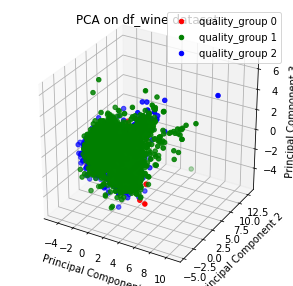

In [510]:
y = df_wine.loc[:,'quality_group'].values
x = StandardScaler().fit_transform(df_wine.iloc[:,0:11])

pca = PCA(n_components=8)
pc = pca.fit_transform(x)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

colors = 'rgbmykc'

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

for i in np.unique(y):
    ax.scatter3D(pc[y==i,0], pc[y==i,1],
             pc[y==i,2], color=colors[i],
               label='quality_group ' + str(i))

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.legend()
plt.title('PCA on df_wine dataset')
plt.show()

# DBSCAN

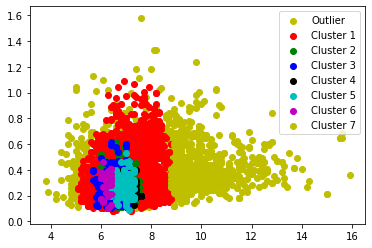

In [511]:
x = df_wine.iloc[:, [1,2,3,4,5]].values
#[1,2,3,4,5]
dbscan = DBSCAN(eps=0.35, min_samples = 50)
clusters = dbscan.fit_predict(x)

colors = 'rgbkcmy'

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x[clusters==i,0], x[clusters==i,1],
                color=colors[i], label=label)

plt.legend()
plt.show()

# Kmeans

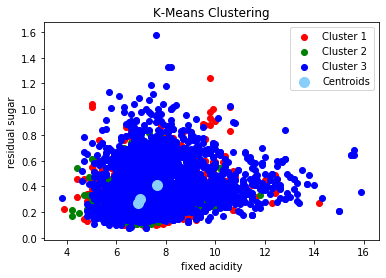

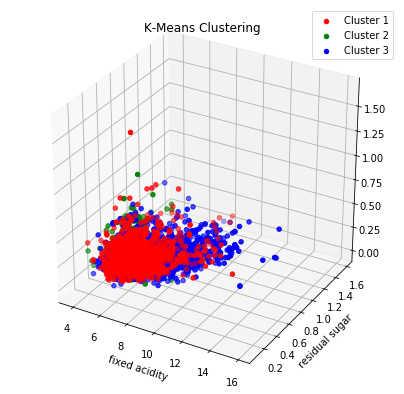

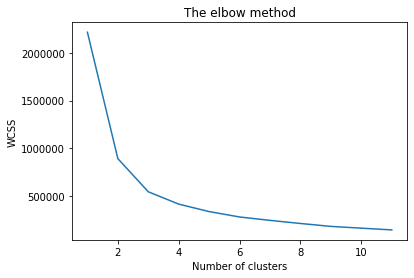

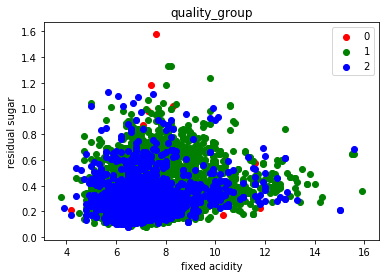

In [512]:
#Part 1
x = df_wine.iloc[:,1:11].values
#[2,3,4,5,6,7]
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(x)

#2D plot
colors = 'rgbkcmy'

for i in np.unique(clusters):
    plt.scatter(x[clusters==i,0], x[clusters==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s=100, c='lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df_wine.columns[1])
plt.ylabel(df_wine.columns[4])
plt.show()


#3D plot
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(x[clusters==i,0],
             x[clusters==i,1],
             x[clusters==i,2],
                 color=colors[i], label='Cluster ' + str(i + 1))

ax.set_xlabel(df_wine.columns[1])
ax.set_ylabel(df_wine.columns[4])

plt.legend()
plt.title('K-Means Clustering')
plt.show()



#Part 2: Find the optimum number of clusters for k-means
from sklearn.cluster import KMeans

wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


# Part 3: Actual Categorization
quality = np.reshape(df_wine.loc[:, ['quality_group']].values, (-1,))
i = 0
for label in np.unique(quality):
    plt.scatter(x[quality==label,0], x[quality==label,1],
                color=colors[i], label=label)
    i += 1

plt.legend()
plt.title('quality_group')
plt.xlabel(df_wine.columns[1])
plt.ylabel(df_wine.columns[4])
plt.show()

# Model Training

# Predicting for quality

In [513]:
#this is for predicting quality

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time = time.time()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100, train_size=0.7)

knn_model = KNeighborsClassifier(n_neighbors = 50) 

knn_model.fit(x_train, y_train)

end_time = time.time()

y_pred = knn_model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7569230769230769


In [514]:
print(y_pred)

[1 1 1 ... 1 1 1]


# Predicting for Type

In [515]:
x2 = df_wine.iloc[:, 0:11]
y2 = df_wine['type']
x2

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  density    pH  sulphates  alcohol  
0         0.045                 45.0  1.00100  3.00   0.450000      8.8  
1         0.049                 14.0  0.99400  3.30   0.490000      9.5  
2         0.050                 30.0  0.99510  3.26   0.440000     10.1  
3         0.058                 47.0  0.99560  3.19   0.400000      9.9  
4         0.058                 47.0  0.99560  3.19   0.400000      9.9  
...         ...                  ...      ...   ...        ...      ...  
6492      0.090                 32.0  0.99490  3.45   0.580000     10.5  
6493      0.062                 39.0  0.99512  3.52   0.531215     11.2  
6494      0.076                 29.0  0.99574  3.42   0.750000     11.0  
6495      0.075                 32.0  0.99547  3.57   0.710000     10.2  
6496      0.067                 18.0  0.99549  3.39   0.660000     11.0  

[6497 rows x 11 columns]

In [516]:
#this is for predicting type

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time2 = time.time()

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 60, train_size=0.7)

In [517]:
knn_model = KNeighborsClassifier(n_neighbors = 50) 

knn_model.fit(x2_train, y2_train)

end_time2 = time.time()

In [518]:
y2_pred = knn_model.predict(x2_test)

In [519]:
print(accuracy_score(y2_test, y2_pred))

0.9235897435897436


In [520]:
print('Time taken for model predicting quality is - ', end_time-start_time)
print('Time taken for model predicting type is - ', end_time2-start_time2)

Time taken for model predicting quality is -  0.011992931365966797
Time taken for model predicting type is -  0.02498483657836914


In [521]:
#this is for predicting quality using PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time = time.time()

x_train, x_test, y_train, y_test = train_test_split(pc, y, random_state = 60, train_size=0.7)

knn_model = KNeighborsClassifier(n_neighbors = 50) 

knn_model.fit(x_train, y_train)

end_time = time.time()

y_pred = knn_model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7815384615384615
